## LINEAR REGRESSION-Lineer Regresyon

Genelde finansal kar analizleri, geçmiş aylara bakarak satış verilerini tahmin etmek, kira tahminleri,
ikinci el araba fiyatları...

Elimizdeki data seti, veri setini biz ikiye ayırırız.

##### Bağımsız Değişkenler  x ile ifade edilir


##### Bağımlı Değişkenler y ile ifade  tahmin edilecekk olan


Bağımsız değişkenlerden yola çıkarak, bağımlı(hedef-target) değişkeni tahmin etmeye çalışırız.

### Uygulama: Simple Linear Regression: Ev Fiyat Tahmini

In [1]:
# Kütüphanelerin Yüklenmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Verinin yüklenmesi...

veri = pd.read_csv("Verisetleri\ev_fiyat_tahmini.csv", sep=";")

veri.head()

,index,MetreKare,oda_sayısı,fiyatlar
0,183,145,3,178311
1,124,115,2,172942
2,125,120,3,142930
3,282,180,4,232026
4,17,65,2,113100


In [3]:
# Bağımlı değişkenlerim ve bağımsız değişkenlerim neler?

# Fiyat bağımlı..(Fiyatı tahmin edeceğiz.) =>y 
# Metrekare, oda_sayısı bağımsız değişkenler. 
# Ve biz metrekarenin fiyatlara etkisini tahmin edeceğiz.

X = veri[["MetreKare"]] # bağımsız değişken
y = veri["fiyatlar"] # bağımlı değişken: HEDEF-TARGET 

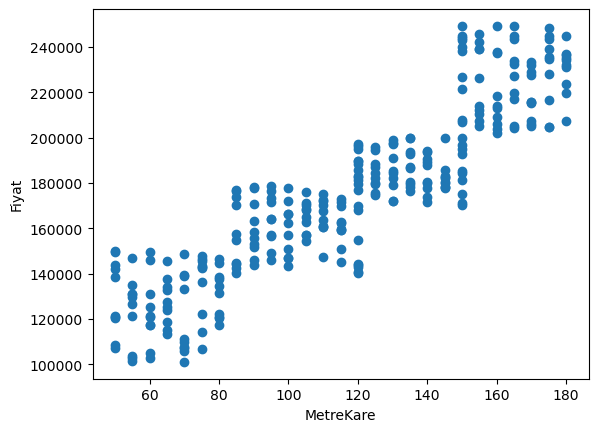

In [94]:
# Veriyi Görselleştirelim;

plt.scatter(X,y)
plt.xlabel("MetreKare")
plt.ylabel("Fiyat")
plt.show()

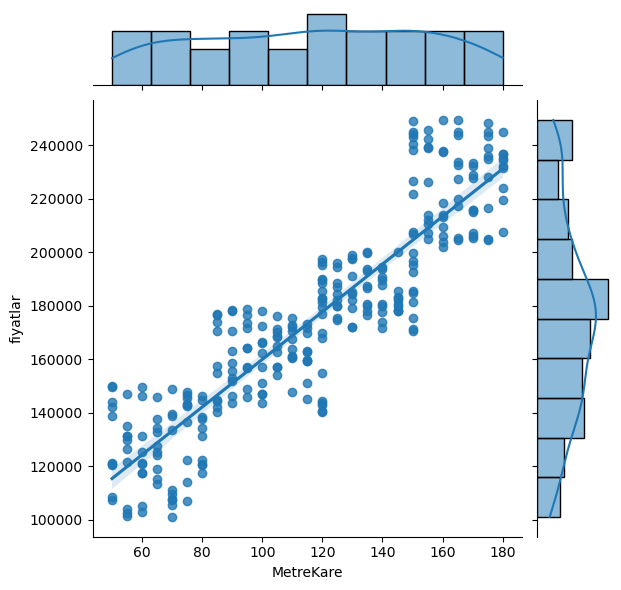

In [95]:
# seaborn ile biraz daha cavcaflı grafik;

sns.jointplot(x="MetreKare", y="fiyatlar", data= veri, kind="reg")

##### Modelin Kurulması

In [5]:
X = veri[["MetreKare"]]
y = veri["fiyatlar"]

reg = LinearRegression() # reg isminde bir obje oluşturuyor.

reg

LinearRegression()

In [9]:
smart_model = reg.fit(X, y)

smart_model

LinearRegression()

In [12]:
print(f" Fiyat = {smart_model.intercept_} + {smart_model.coef_} * MetreKare ")
print()
print(f" y = {smart_model.intercept_} + {smart_model.coef_} * X ")

 Fiyat = 70788.37516568486 + [890.78753191] * MetreKare 

 y = 70788.37516568486 + [890.78753191] * X 


In [13]:
metre = int(input("Tahmin edilecek metrekare gir"))
print("Tahmin", smart_model.predict([[metre]]))

Tahmin edilecek metrekare gir105
Tahmin [164321.0660162]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
# Stats model analizi...
import statsmodels.api as sm

lineerModelStats = sm.OLS(y, X)

modelSTATS = lineerModelStats.fit()

print("STATS Model Değerleri", modelSTATS.summary())


STATS Model Değerleri                                  OLS Regression Results                                
Dep. Variable:               fiyatlar   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.198e+04
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                   2.93e-237
Time:                        21:59:06   Log-Likelihood:                         -3374.8
No. Observations:                 290   AIC:                                      6752.
Df Residuals:                     289   BIC:                                      6755.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

### Aylara Göre Reklam Harcamalarının Satışlara Etkisi

In [45]:
# Kütüphanelerin Yüklenmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [46]:
# Verinin yüklenmesi

veri_reklam = pd.read_csv("Verisetleri\den.csv", sep=";")

veri_reklam

,Aylar,Reklam,Satis
0,1,4,13
1,2,6,31
2,3,4,14
3,4,6,27
4,5,6,23
5,6,3,19
6,7,7,35
7,8,8,35
8,9,7,33
9,10,6,30


In [51]:
# Bağımsız ve bağımlı değişkenlerin tespiti

X = veri_reklam[["Reklam"]]
y = veri_reklam["Satis"]

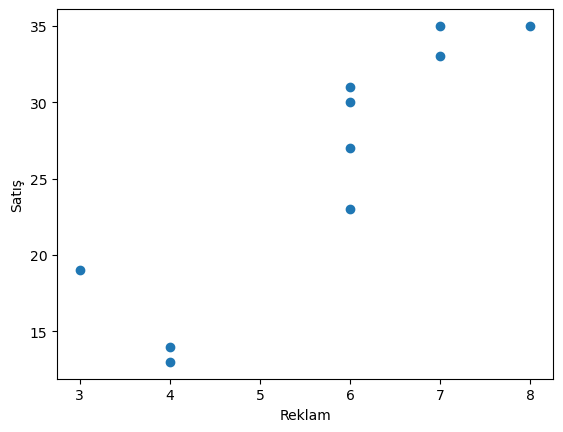

In [52]:
# Grafiksel görünüm
plt.scatter(X, y)
plt.xlabel("Reklam")
plt.ylabel("Satış")
plt.show()

In [54]:
# Modeli kuruyoruz;

# Bağımsız ve bağımlı değişkenlerin tespiti

X = veri_reklam[["Reklam"]]
y = veri_reklam["Satis"]

reg = LinearRegression()

smart_model = reg.fit(X,y)

smart_model


LinearRegression()

In [58]:
reklam = float(input("Tahmin edilecek reklamı gir"))

print("Tahmin", smart_model.predict([[reklam]]))

Tahmin edilecek reklamı gir120
Tahmin [569.05429864]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
# 22.02.2024 Burada kaldık. Burası detaylı incelenecek.
import statsmodels.api as sm

lineerModelStats = sm.OLS(y, X)

modelSTATS = lineerModelStats.fit()

print("STATS Model Değerleri", modelSTATS.summary())

STATS Model Değerleri                                  OLS Regression Results                                
Dep. Variable:                  Satis   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              518.9
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                    2.87e-09
Time:                        21:19:39   Log-Likelihood:                         -26.853
No. Observations:                  10   AIC:                                      55.71
Df Residuals:                       9   BIC:                                      56.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Avg.Area Income: Ortalama alan başına düşen gelir.
Avg.Area House Age: Evin yaşı ort.
Avg.Area Number of Rooms: oda sayısı ortalaması
Avg.Area Number of Bedrooms: Yatak odası ortalaması...
Population: Alanın nüfusu
Price: Ücret
